In [1]:
# 그래프에서 한글 출력 설정
#1. 한글 설정 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,248 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and dire

In [2]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

import missingno as msno # 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

#한글 안돼서 추가
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/24_소모임/beyond_1/'

df = pd.read_csv(path + '결혼에 대한 견해 조사.csv', encoding = 'cp949')
df.head()

,성별,행정구역별,연령·교육정도·혼인상태별,항목,단위,1998 년,2002 년,2006 년,2008 년,2010 년,2012 년,2014 년,2016 년,2018 년,2020 년,2022 년,Unnamed: 16
0,전체,전국,전체,15세이상인구,NaN,100.00000,100.0,100.0,100.00000,100.00000,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,전체,전국,전체,13세이상인구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,100.00000,100.00000,100.00000,100.00000,NaN
2,전체,전국,전체,반드시 해야 한다,NaN,33.57821,25.6,25.7,21.69416,21.69416,20.56487,14.90635,12.52565,11.14032,16.76107,15.28006,NaN
3,전체,전국,전체,하는 것이 좋다,NaN,39.92774,43.5,42.0,43.04054,43.04054,42.44098,41.92799,39.34660,36.97345,34.44871,34.75066,NaN
4,전체,전국,전체,"해도 좋고, 하지 않아도 좋다",NaN,23.79316,27.2,27.5,30.74175,30.74175,33.41536,38.91276,42.85594,46.58255,41.40890,43.20220,NaN


In [5]:
idx=df[df["행정구역별"] != '전국'].index
df.drop(idx, inplace= True)

idx2=df[(df["연령·교육정도·혼인상태별"] != '13~19세') &
        (df["연령·교육정도·혼인상태별"] != '15~19세') &
        (df["연령·교육정도·혼인상태별"] != '20~29세') &
        (df["연령·교육정도·혼인상태별"] != '30~39세') &
        (df["연령·교육정도·혼인상태별"] != '40~49세') &
        (df["연령·교육정도·혼인상태별"] != '50~59세') &
        (df["연령·교육정도·혼인상태별"] != '60세 이상')].index
df.drop(idx2, inplace= True)

df.head(15)

,성별,행정구역별,연령·교육정도·혼인상태별,항목,단위,1998 년,2002 년,2006 년,2008 년,2010 년,2012 년,2014 년,2016 년,2018 년,2020 년,2022 년,Unnamed: 16
8,전체,전국,13~19세,13세이상인구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,100.00000,100.00000,100.00000,100.00000,NaN
9,전체,전국,13~19세,반드시 해야 한다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.19398,6.01130,3.72289,5.64948,5.12323,NaN
10,전체,전국,13~19세,하는 것이 좋다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.12005,31.08633,24.64014,27.14880,23.97060,NaN
11,전체,전국,13~19세,"해도 좋고, 하지 않아도 좋다",NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.64087,52.37940,58.51512,54.06777,56.82577,NaN
12,전체,전국,13~19세,하지 않는 것이 좋다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47333,3.11879,3.96601,5.14004,3.73750,NaN
13,전체,전국,13~19세,하지 말아야 한다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55904,0.88436,0.89415,1.44803,1.18406,NaN
14,전체,전국,13~19세,잘 모르겠다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.01274,6.51984,8.26170,6.54589,9.15885,NaN
15,전체,전국,15~19세,15세이상인구,NaN,100.00000,100.0,100.0,100.00000,100.00000,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
16,전체,전국,15~19세,반드시 해야 한다,NaN,20.11150,16.2,15.6,15.12729,15.12729,12.72041,NaN,NaN,NaN,NaN,NaN,NaN
17,전체,전국,15~19세,하는 것이 좋다,NaN,40.76024,41.4,43.6,42.04228,42.04228,41.45703,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df["연령·교육정도·혼인상태별"] =='15~19세']

,성별,행정구역별,연령·교육정도·혼인상태별,항목,단위,1998 년,2002 년,2006 년,2008 년,2010 년,2012 년,2014 년,2016 년,2018 년,2020 년,2022 년,Unnamed: 16
15,전체,전국,15~19세,15세이상인구,NaN,100.00000,100.0,100.0,100.00000,100.00000,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
16,전체,전국,15~19세,반드시 해야 한다,NaN,20.11150,16.2,15.6,15.12729,15.12729,12.72041,NaN,NaN,NaN,NaN,NaN,NaN
17,전체,전국,15~19세,하는 것이 좋다,NaN,40.76024,41.4,43.6,42.04228,42.04228,41.45703,NaN,NaN,NaN,NaN,NaN,NaN
18,전체,전국,15~19세,"해도 좋고, 하지 않아도 좋다",NaN,32.43786,36.0,34.1,36.77466,36.77466,39.87051,NaN,NaN,NaN,NaN,NaN,NaN
19,전체,전국,15~19세,하지 않는 것이 좋다,NaN,1.18224,1.5,1.2,3.03525,3.03525,1.62234,NaN,NaN,NaN,NaN,NaN,NaN
20,전체,전국,15~19세,하지 말아야 한다,NaN,0.24184,0.3,0.4,0.69172,0.69172,0.22157,NaN,NaN,NaN,NaN,NaN,NaN
21,전체,전국,15~19세,잘 모르겠다,NaN,5.26632,4.6,5.1,2.32880,2.32880,4.10813,NaN,NaN,NaN,NaN,NaN,NaN
1976,여자,전국,15~19세,15세이상인구,NaN,100.00000,100.0,100.0,100.00000,100.00000,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
1977,여자,전국,15~19세,반드시 해야 한다,NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,NaN,NaN,NaN,NaN,NaN,NaN
1978,여자,전국,15~19세,하는 것이 좋다,NaN,38.02795,36.4,39.8,38.53255,38.53255,37.62940,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
idx3=df[df["성별"] == '전체'].index
df.drop(idx3, inplace= True)

idx4=df[(df["항목"] != '반드시 해야 한다') &
        (df["항목"] != '하는 것이 좋다') &
        (df["항목"] != '해도 좋고, 하지 않아도 좋다') &
        (df["항목"] != '하지 않는 것이 좋다') &
        (df["항목"] != '하지 말아야 한다') ].index
df.drop(idx4, inplace= True)

df.head(15)

,성별,행정구역별,연령·교육정도·혼인상태별,항목,단위,1998 년,2002 년,2006 년,2008 년,2010 년,2012 년,2014 년,2016 년,2018 년,2020 년,2022 년,Unnamed: 16
1970,여자,전국,13~19세,반드시 해야 한다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.83627,3.30914,2.17563,2.92897,2.58482,NaN
1971,여자,전국,13~19세,하는 것이 좋다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.27076,26.39066,19.08989,18.99086,18.77311,NaN
1972,여자,전국,13~19세,"해도 좋고, 하지 않아도 좋다",NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.90970,59.51845,66.39545,62.79527,63.64166,NaN
1973,여자,전국,13~19세,하지 않는 것이 좋다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.53680,4.24417,5.25286,7.60814,5.47985,NaN
1974,여자,전국,13~19세,하지 말아야 한다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62210,0.89726,1.42543,1.95185,1.52451,NaN
1977,여자,전국,15~19세,반드시 해야 한다,NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,NaN,NaN,NaN,NaN,NaN,NaN
1978,여자,전국,15~19세,하는 것이 좋다,NaN,38.02795,36.4,39.8,38.53255,38.53255,37.62940,NaN,NaN,NaN,NaN,NaN,NaN
1979,여자,전국,15~19세,"해도 좋고, 하지 않아도 좋다",NaN,41.46376,46.4,43.2,43.84160,43.84160,47.68207,NaN,NaN,NaN,NaN,NaN,NaN
1980,여자,전국,15~19세,하지 않는 것이 좋다,NaN,1.67415,2.5,1.9,4.29226,4.29226,2.30160,NaN,NaN,NaN,NaN,NaN,NaN
1981,여자,전국,15~19세,하지 말아야 한다,NaN,0.26728,0.3,0.5,0.79251,0.79251,0.16786,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Clean up the data by removing unnecessary columns and preparing for processing
#df = df.drop(columns=["Unnamed: 16"])  # Remove unnecessary column

# Define the year ranges for easier indexing
years_1998_2012 = ['1998 년', '2002 년', '2006 년', '2008 년', '2010 년', '2012 년']
years_2014_2022 = ['2014 년', '2016 년', '2018 년', '2020 년', '2022 년']

# Fill NaN values for 13~19세 using 15~19세 values in the range 1998~2012
for year in years_1998_2012:
    df.loc[(df['연령·교육정도·혼인상태별'] == '13~19세') & (df[year].isna()), year] = \
        df.loc[(df['연령·교육정도·혼인상태별'] == '15~19세') & (df['항목'] == df.loc[(df['연령·교육정도·혼인상태별'] == '13~19세') & (df[year].isna()),'항목'].values[0])  & (df['성별'] == df.loc[(df['연령·교육정도·혼인상태별'] == '13~19세') & (df[year].isna()),'성별'].values[0]), year].values[0]
# Fill NaN values for 15~19세 using 13~19세 values in the range 2014~2022
for year in years_2014_2022:
    df.loc[(df['연령·교육정도·혼인상태별'] == '15~19세') & (df[year].isna()), year] = \
        df.loc[(df['연령·교육정도·혼인상태별'] == '13~19세')& (df['항목'] == df.loc[(df['연령·교육정도·혼인상태별'] == '15~19세') & (df[year].isna()),'항목'].values[0])  & (df['성별'] == df.loc[(df['연령·교육정도·혼인상태별'] == '15~19세') & (df[year].isna()),'성별'].values[0]), year].values[0]

In [9]:
df

,성별,행정구역별,연령·교육정도·혼인상태별,항목,단위,1998 년,2002 년,2006 년,2008 년,2010 년,2012 년,2014 년,2016 년,2018 년,2020 년,2022 년,Unnamed: 16
1970,여자,전국,13~19세,반드시 해야 한다,NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,5.83627,3.30914,2.17563,2.92897,2.58482,NaN
1971,여자,전국,13~19세,하는 것이 좋다,NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,32.27076,26.39066,19.08989,18.99086,18.77311,NaN
1972,여자,전국,13~19세,"해도 좋고, 하지 않아도 좋다",NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,53.90970,59.51845,66.39545,62.79527,63.64166,NaN
1973,여자,전국,13~19세,하지 않는 것이 좋다,NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,1.53680,4.24417,5.25286,7.60814,5.47985,NaN
1974,여자,전국,13~19세,하지 말아야 한다,NaN,13.41068,10.5,10.3,10.54577,10.54577,7.95622,0.62210,0.89726,1.42543,1.95185,1.52451,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,남자,전국,60세 이상,반드시 해야 한다,NaN,66.14440,53.7,53.9,42.81638,42.81638,43.44668,34.43461,28.48333,26.21982,37.04142,32.94780,NaN
3979,남자,전국,60세 이상,하는 것이 좋다,NaN,26.22784,35.9,35.0,42.36604,42.36604,41.27420,43.73644,47.46891,46.99096,40.58773,42.02635,NaN
3980,남자,전국,60세 이상,"해도 좋고, 하지 않아도 좋다",NaN,6.38361,8.4,8.6,12.46867,12.46867,13.40764,19.34109,21.55402,24.09339,18.97546,21.80262,NaN
3981,남자,전국,60세 이상,하지 않는 것이 좋다,NaN,0.39117,0.7,0.6,1.24920,1.24920,0.71350,0.96250,0.85694,1.09954,1.19340,1.19340,NaN


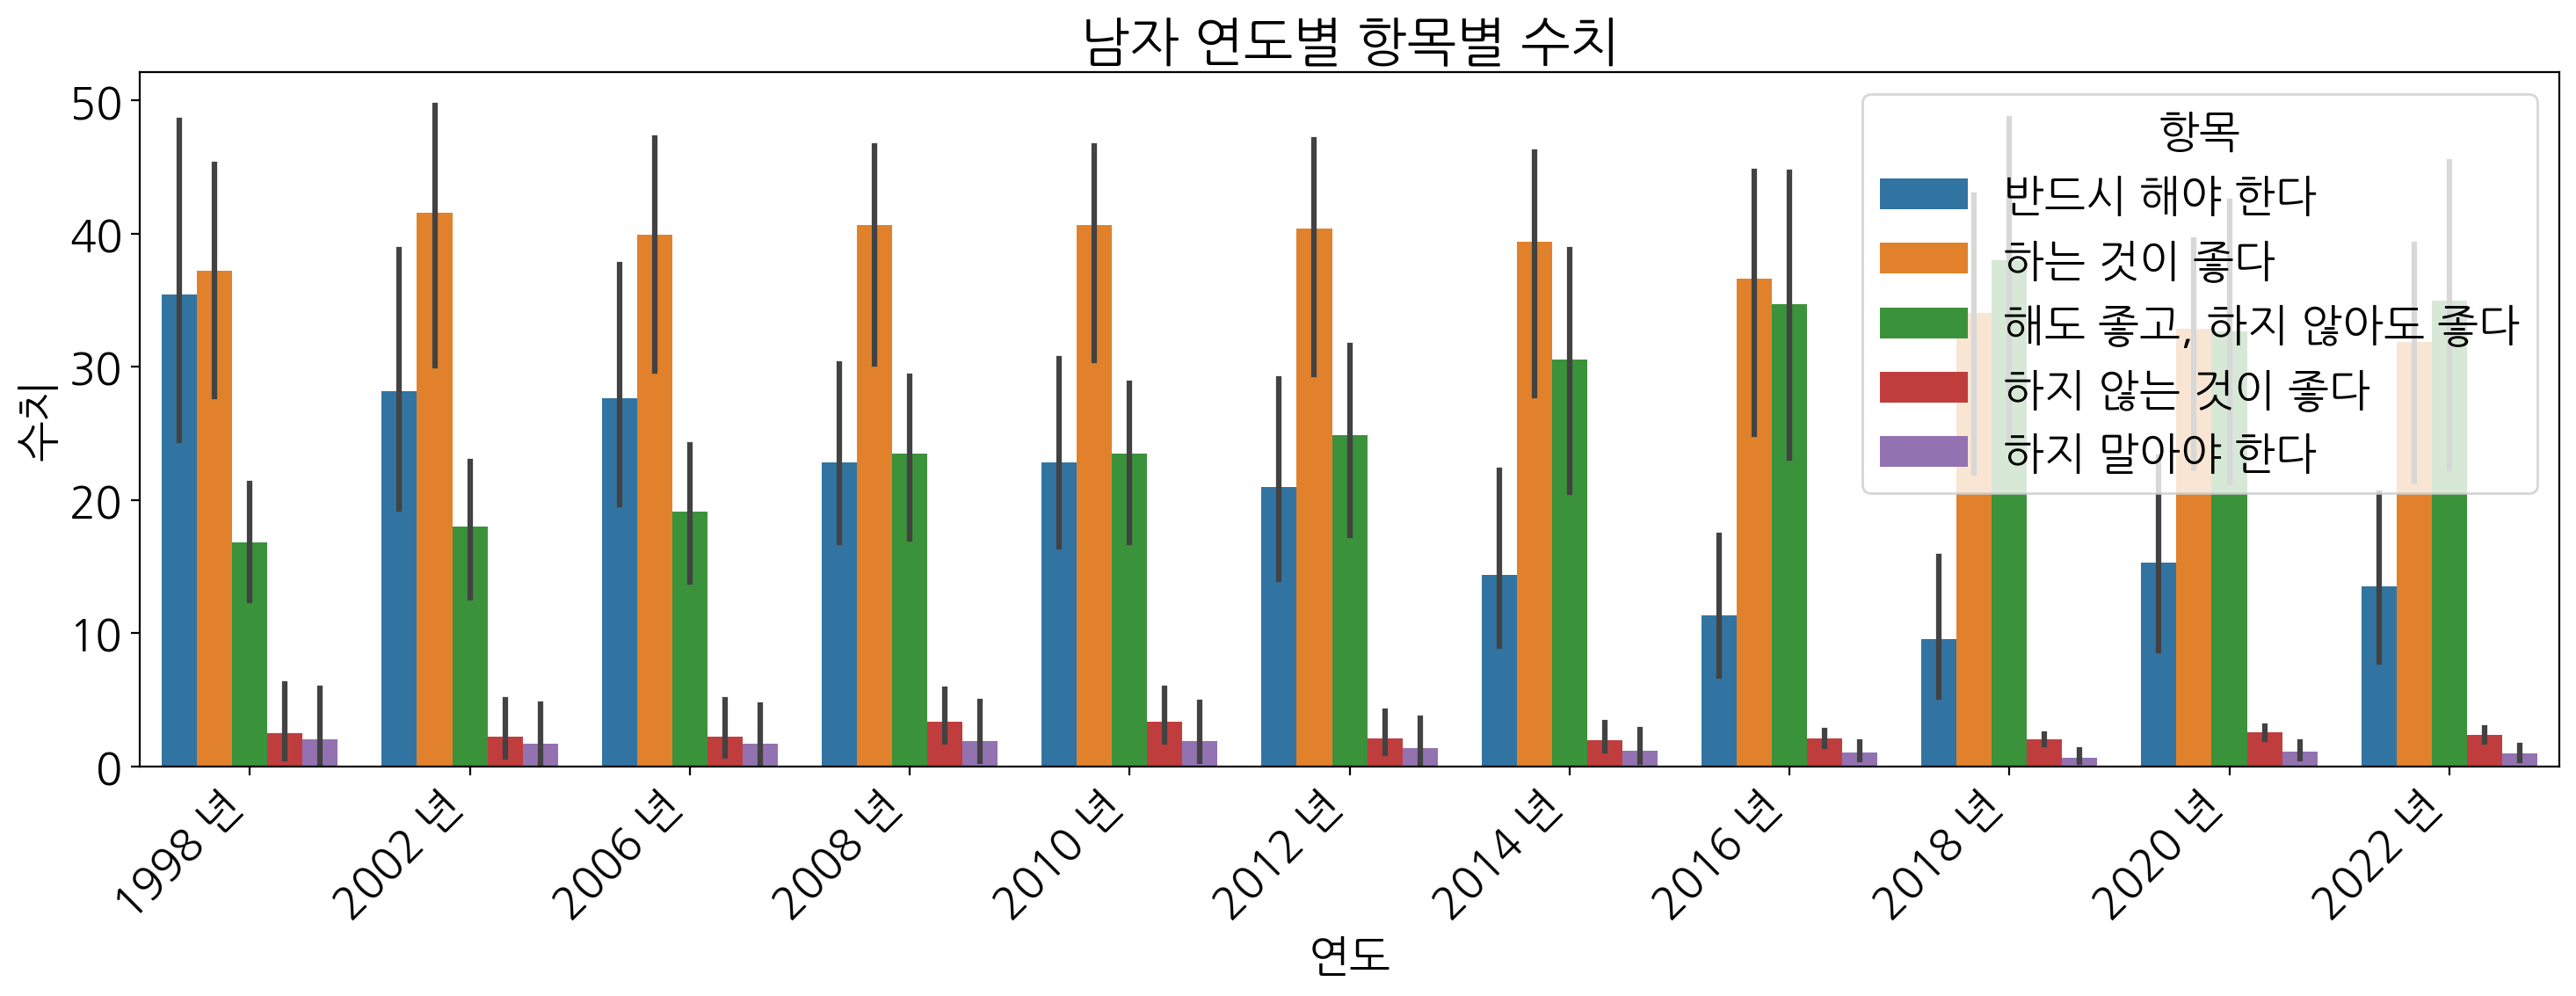

In [10]:
import seaborn as sns

# Filter data for '남자' (Male)
male_data = df[df['성별'] == '남자']

# Melt the DataFrame to reshape it for plotting
melted_data = pd.melt(male_data, id_vars=['항목'], value_vars=years_1998_2012 + years_2014_2022,
                      var_name='연도', value_name='수치')

# Convert '연도' column to string type to avoid potential issues with plotting
melted_data['연도'] = melted_data['연도'].astype(str)

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.barplot(x='연도', y='수치', hue='항목', data=melted_data)
plt.title('남자 연도별 항목별 수치')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

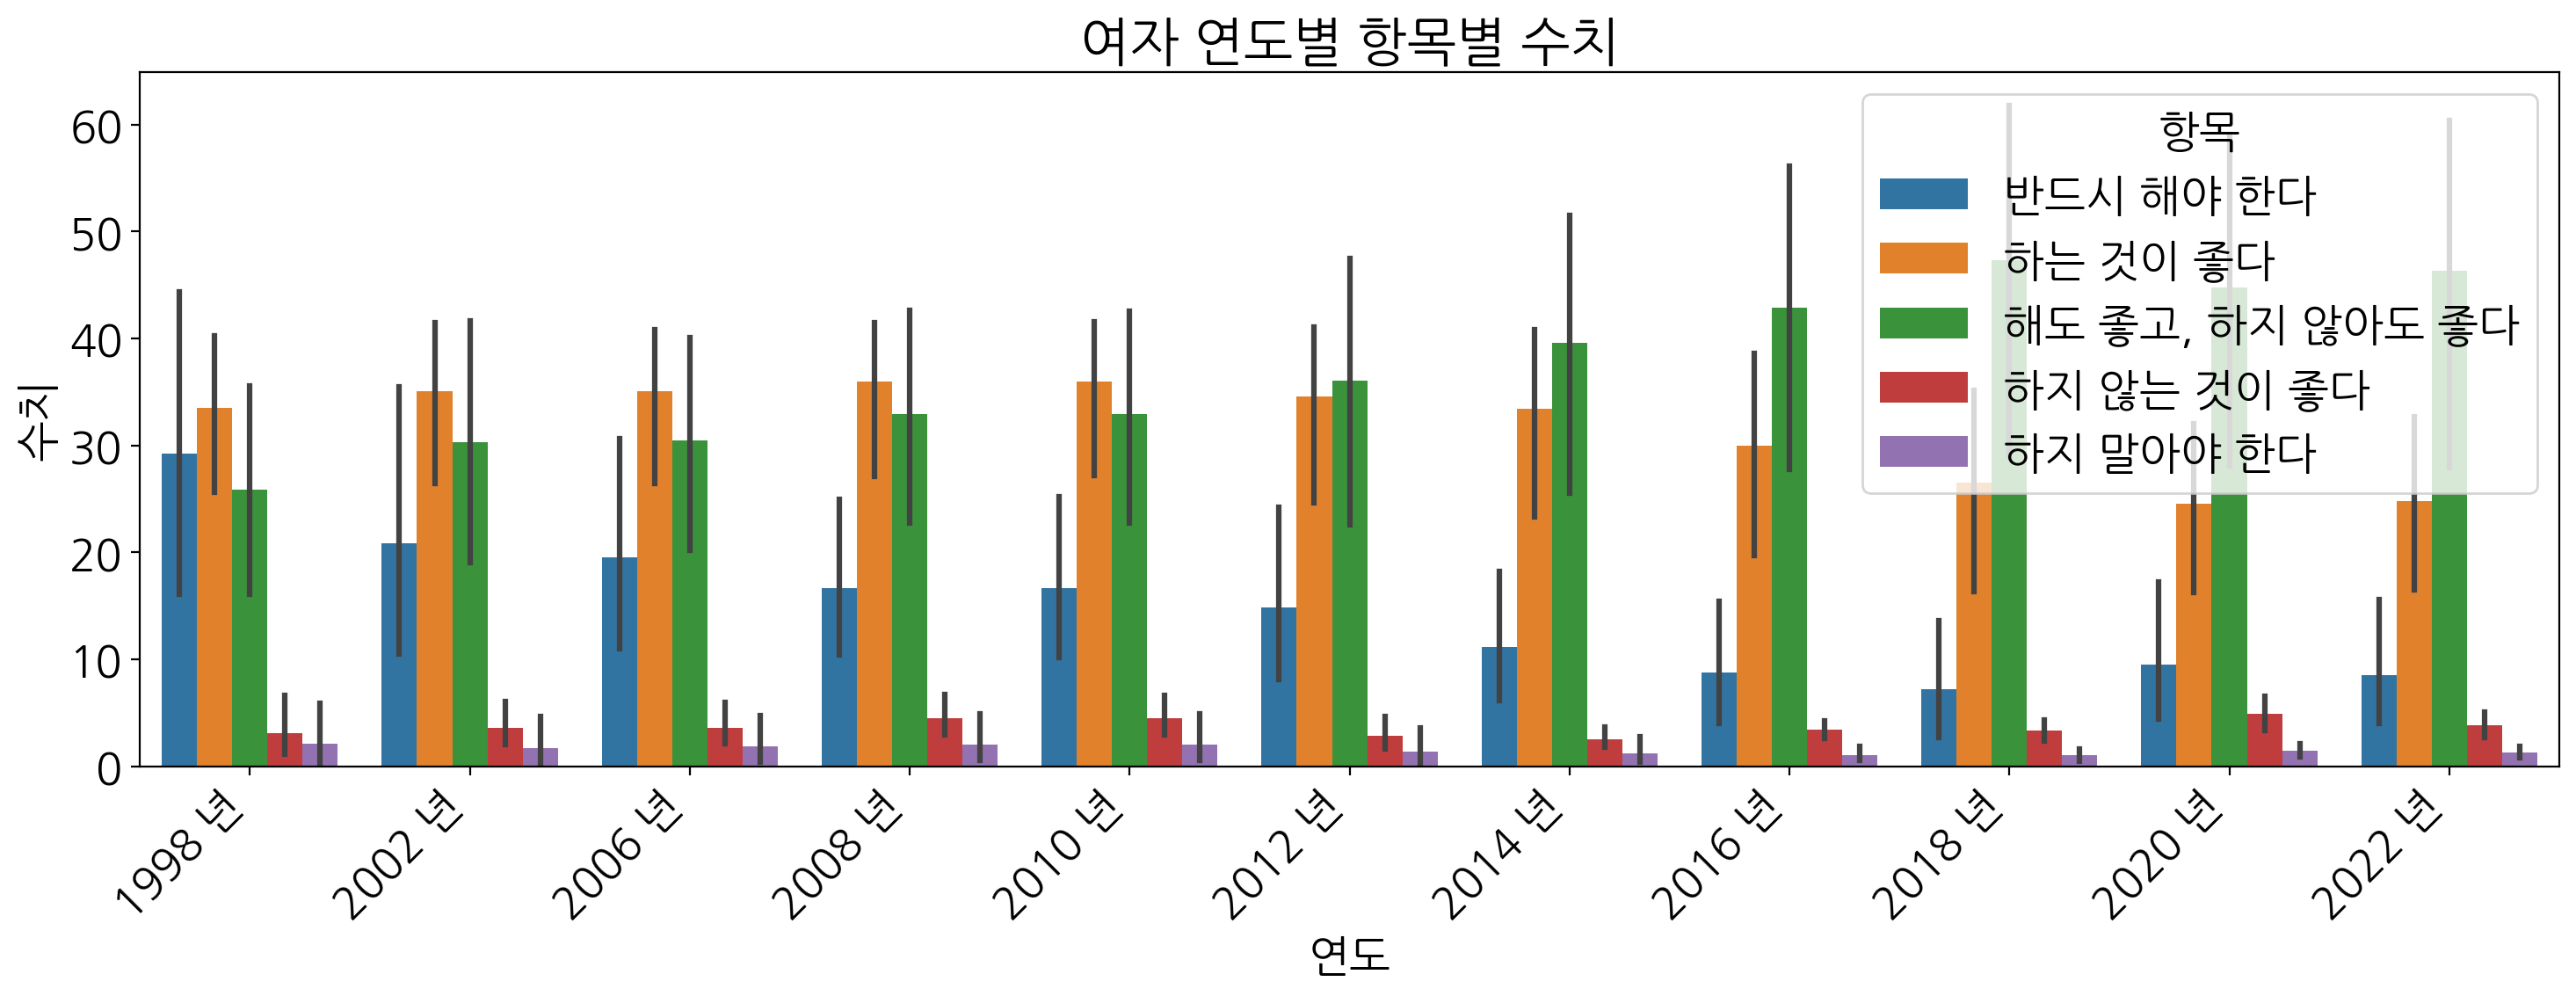

In [11]:
# Filter data for '여자' (Female)
female_data = df[df['성별'] == '여자']

# Melt the DataFrame to reshape it for plotting
melted_data2 = pd.melt(female_data, id_vars=['항목'], value_vars=years_1998_2012 + years_2014_2022,
                      var_name='연도', value_name='수치')

# Convert '연도' column to string type to avoid potential issues with plotting
melted_data2['연도'] = melted_data2['연도'].astype(str)

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.barplot(x='연도', y='수치', hue='항목', data=melted_data2)
plt.title('여자 연도별 항목별 수치')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 병합

In [12]:
import seaborn as sns

birth_rate = [1.464,1.178,1.132,1.192,1.226,1.297,1.205,1.172, 0.977,0.837,0.778]

birth_rate_data = pd.DataFrame({'연도': years_1998_2012 + years_2014_2022, '출생률': birth_rate})
birth_rate_data['연도'] = birth_rate_data['연도'].astype(str)  # Ensure '연도' is string type

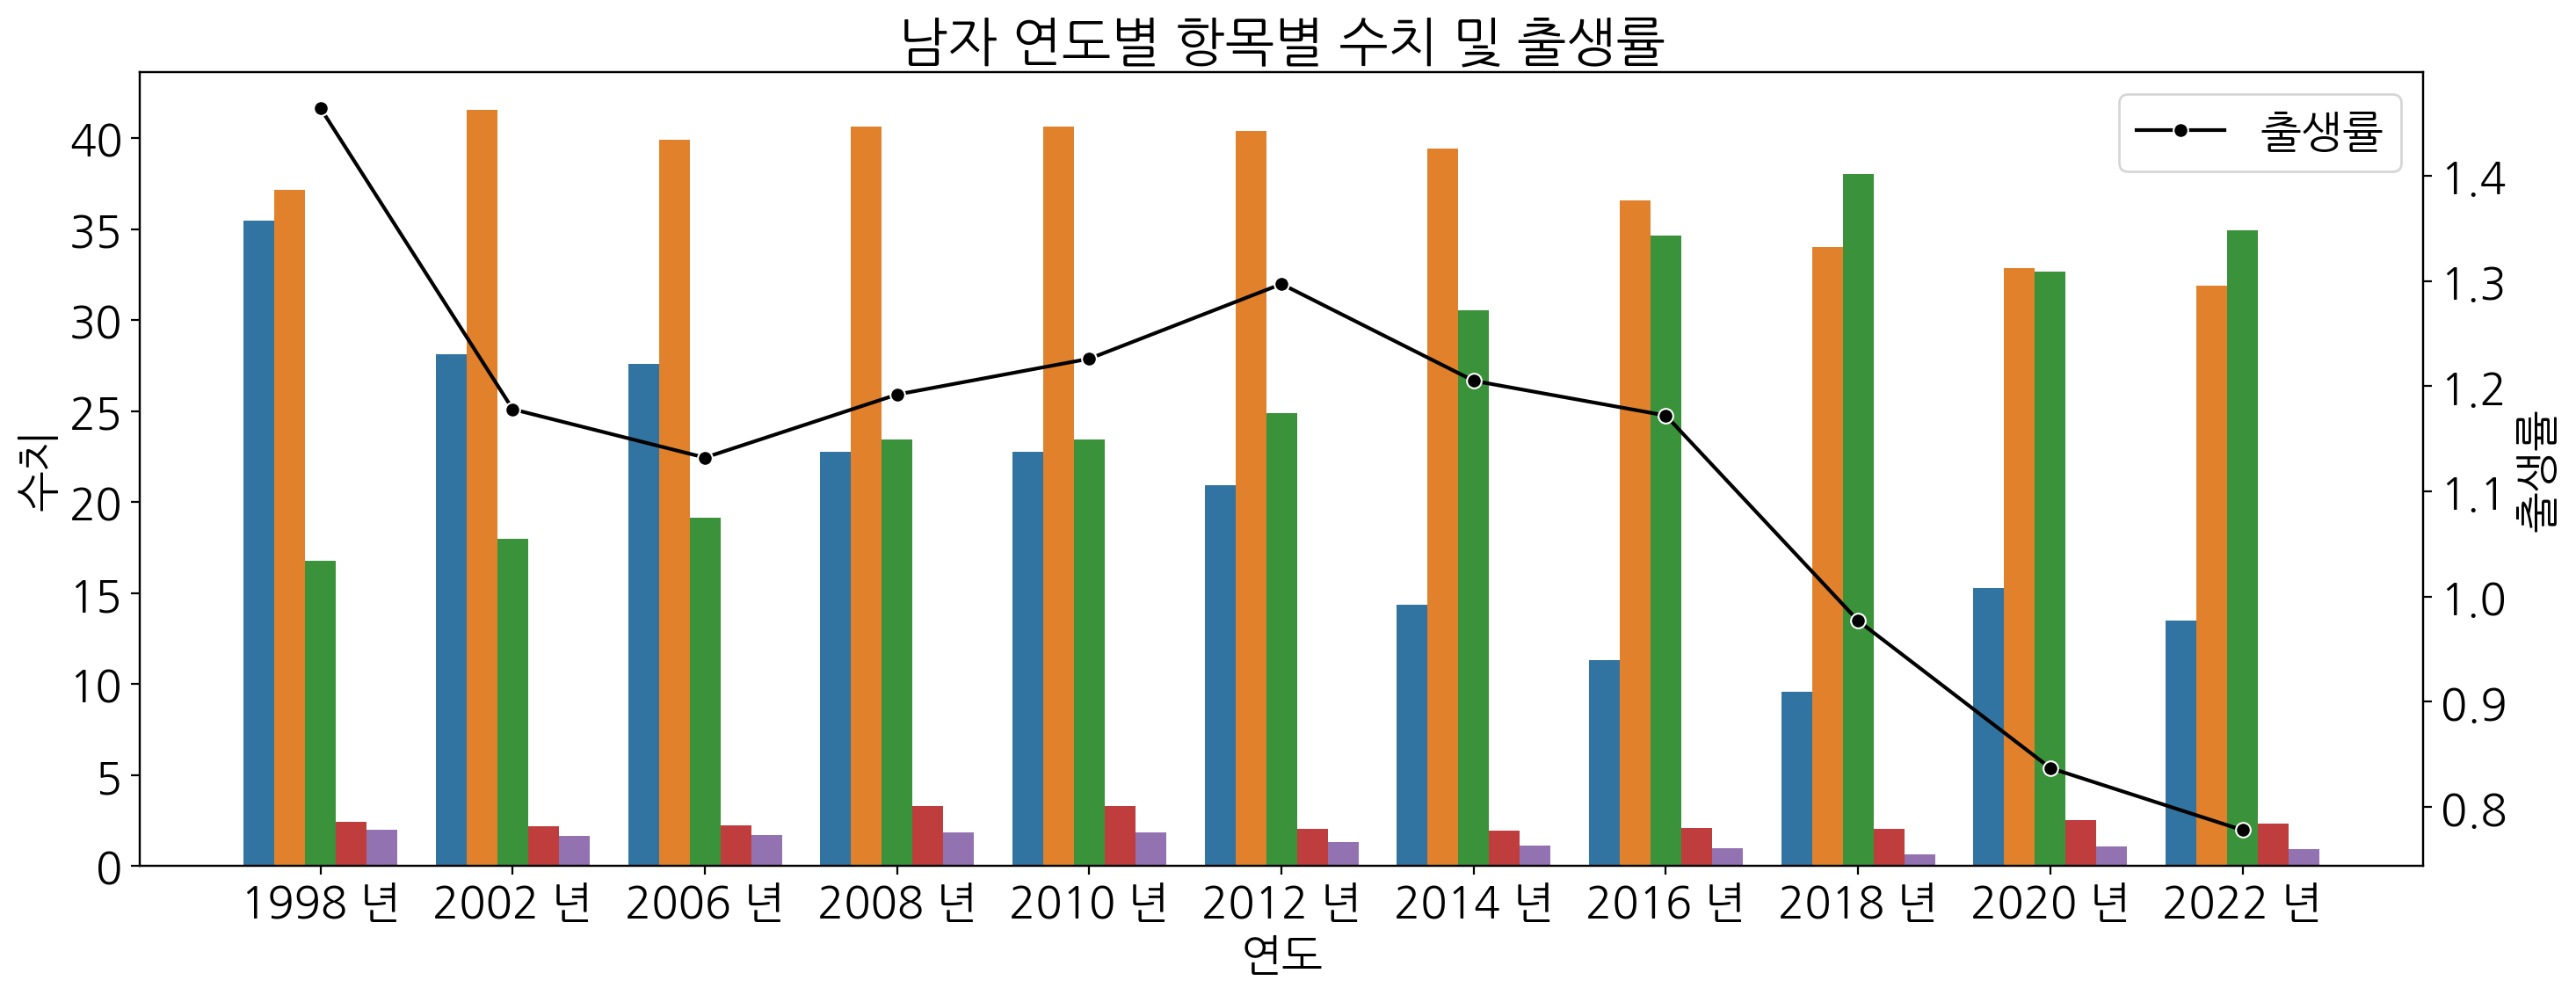

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot on the primary y-axis
sns.barplot(x='연도', y='수치', hue='항목', data=melted_data, ax=ax1, ci = None, legend = False)
ax1.set_ylabel('수치')
ax1.set_title('남자 연도별 항목별 수치 및 출생률')
#ax1.tick_params(axis='x', rotation=45, labelrotation=45, ha='right')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Line plot for birth rate on the secondary y-axis
sns.lineplot(x='연도', y='출생률', data=birth_rate_data, ax=ax2, color='black', marker='o', label='출생률')
ax2.set_ylabel('출생률')
ax2.legend(loc='upper right')  # Add a legend for the line plot

plt.tight_layout()
plt.show()

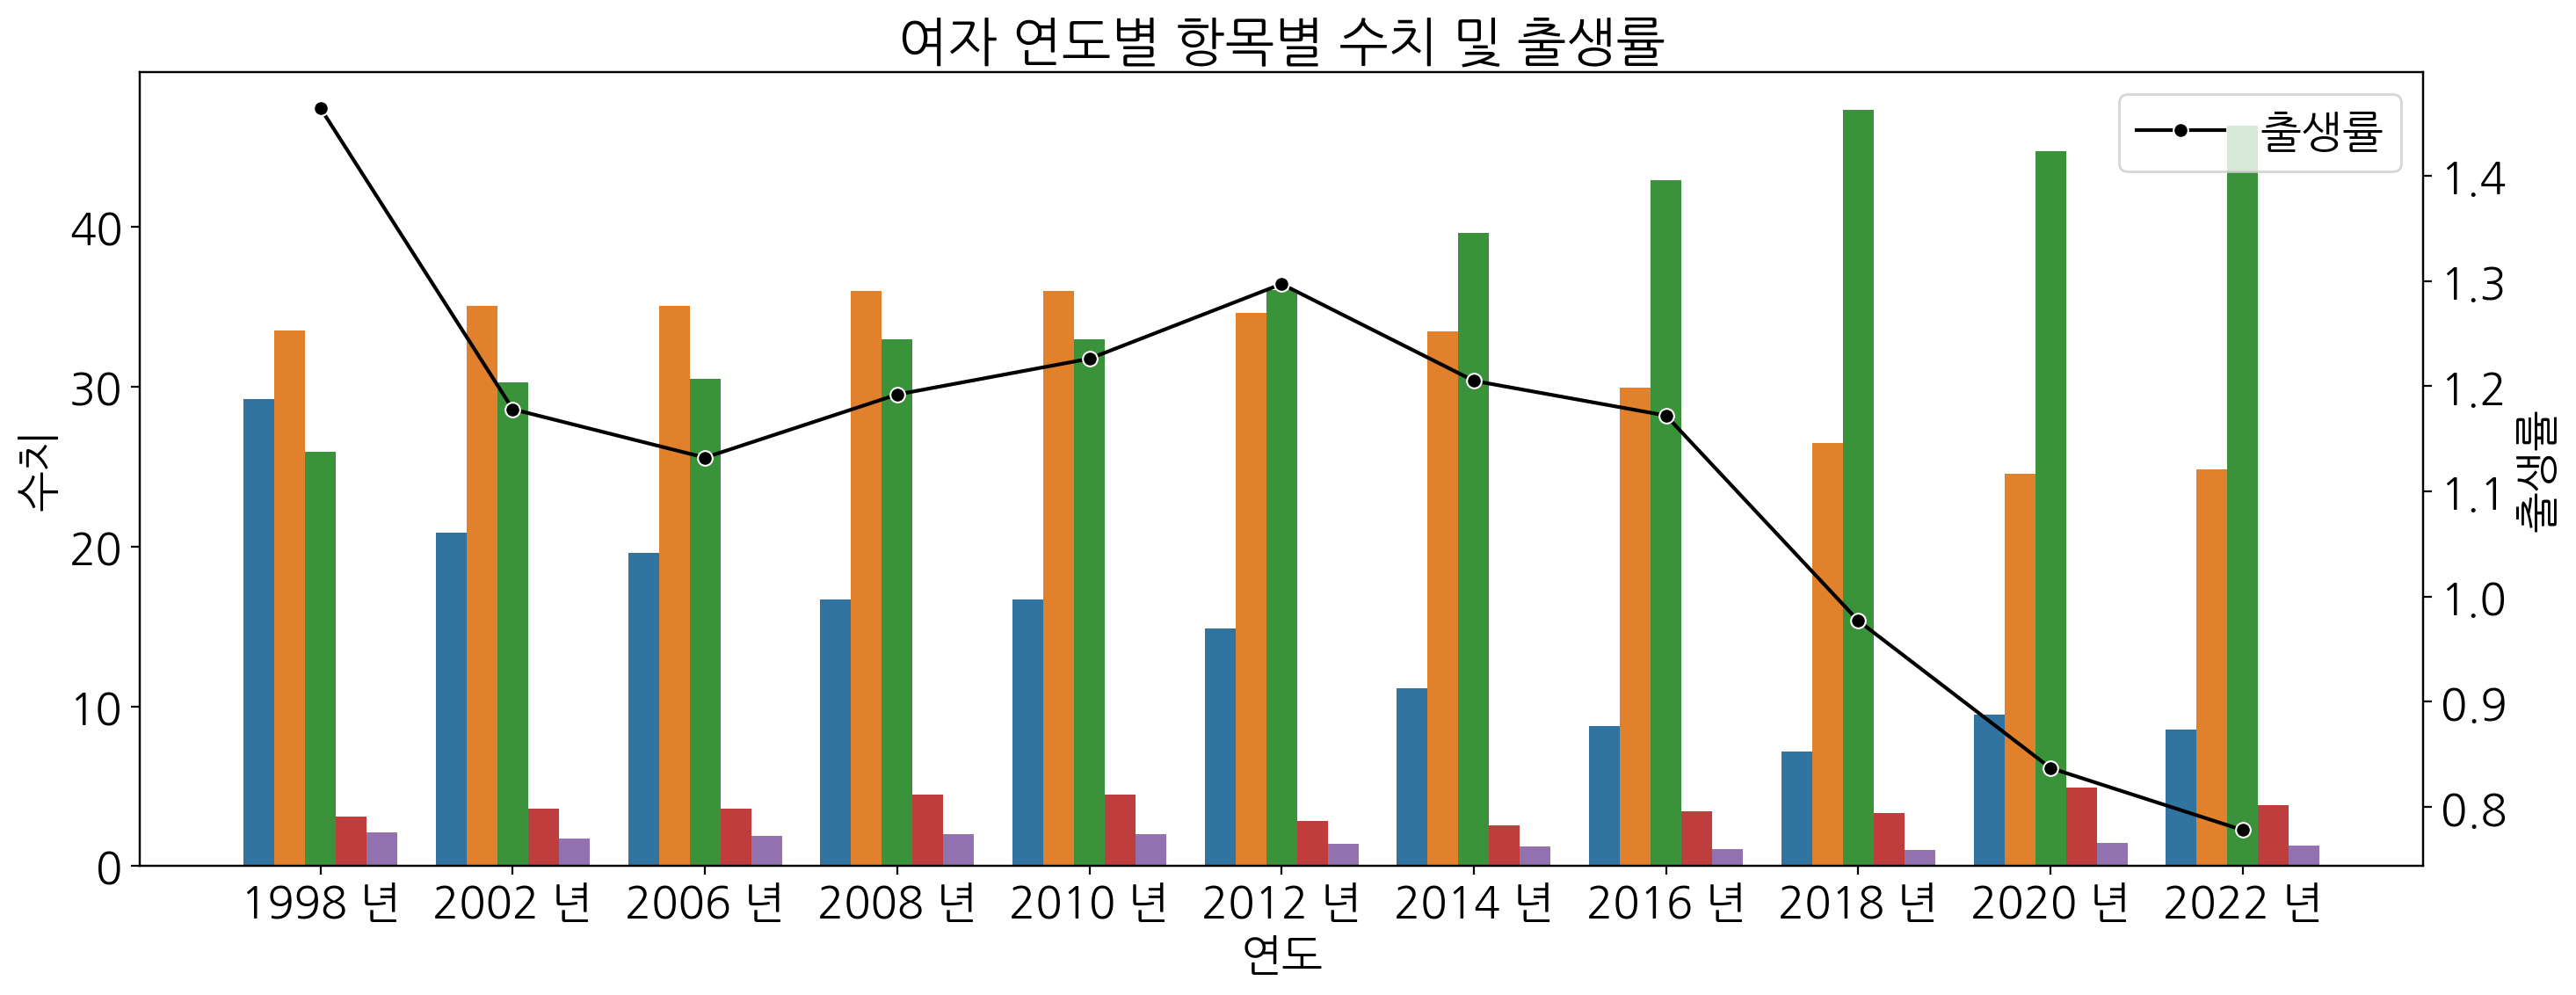

In [18]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot on the primary y-axis
sns.barplot(x='연도', y='수치', hue='항목', data=melted_data2, ax=ax1, ci = None,legend=False)
ax1.set_ylabel('수치')
ax1.set_title('여자 연도별 항목별 수치 및 출생률')
#ax1.tick_params(axis='x', rotation=45, labelrotation=45, ha='right')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Line plot for birth rate on the secondary y-axis
sns.lineplot(x='연도', y='출생률', data=birth_rate_data, ax=ax2, color='black', marker='o', label='출생률')
ax2.set_ylabel('출생률')
ax2.legend(loc='upper right')  # Add a legend for the line plot

plt.tight_layout()
plt.show()